# Target market analysis

Goal - Which are the two best markets to advertise?

In [1]:
%matplotlib inline
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

#set pandas to see more columns and rows
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [2]:
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [3]:
#data.shape
#data.describe()
#data.head(3).transpose()

ROLE INTEREST ANALYSIS

In [4]:
#JobRoleInterest analysis 
#data['JobRoleInterest'].head(150)
#data['JobRoleInterest'].value_counts(normalize=True, dropna=False) *100
#data['JobRoleInterest'].value_counts(normalize=True) *100
#data['JobRoleInterest'].isna().sum()

#take data without NAN values - interested in something
jobint_nonan =  data[data['JobRoleInterest'].notnull()]
#jobint_nonan['JobRoleInterest'].head(100)

1    31.650458
3    15.889588
4    15.217391
5    12.042334
2    10.883867
Name: NumOfInterests, dtype: float64


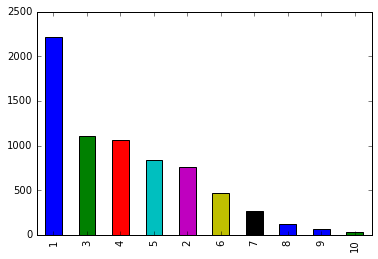

In [5]:
#create column with number of interest of each respondant
jobint_nonan['NumOfInterests'] = jobint_nonan['JobRoleInterest'].str.split(', ')
jobint_nonan['NumOfInterests'] = jobint_nonan['NumOfInterests'].str.len()

#number of interest of each respondant - relative table/ absolute graph
print(jobint_nonan['NumOfInterests'].value_counts(normalize=True).head(5)*100)
jobint_nonan['NumOfInterests'].value_counts().head(10).plot(kind='bar')


In [6]:
#filter who is interested in our fiels
wanted_f = ['Web Developer', 'Mobile Developer']
jobint_nonan['InterestUs'] = jobint_nonan['JobRoleInterest'].str.contains('|'.join(wanted_f))
#jobint_nonan.head()

True     86.241419
False    13.758581
Name: InterestUs, dtype: float64


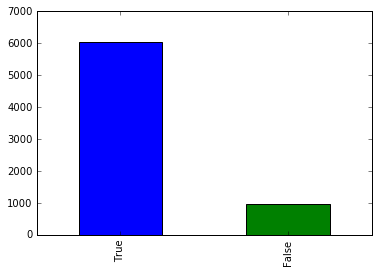

In [7]:
#number of respondents interested in our fiels - relative table/ absolute graph
print(jobint_nonan['InterestUs'].value_counts(normalize=True)*100)
jobint_nonan['InterestUs'].value_counts().plot(kind='bar')

United States of America    45.340563
India                        7.505930
United Kingdom               4.761098
Canada                       3.744493
Poland                       2.050152
Name: CountryLive, dtype: float64


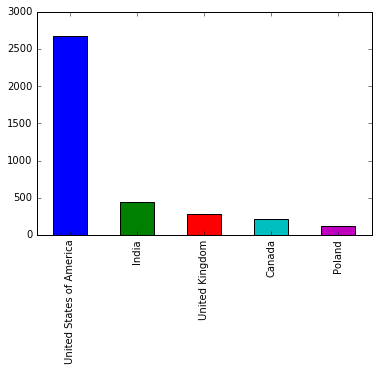

In [8]:
#select only intereste in our fiels
InterestUs = jobint_nonan[jobint_nonan['InterestUs'] == True]
#InterestUs.shape

#distribution of interested respondent in our fields over the countries - relative table/ absolute graph
print(InterestUs['CountryLive'].value_counts(normalize = True).head(5)*100)
InterestUs['CountryLive'].value_counts().head(5).plot(kind='Bar')  

CONCLUSION - Based on simple  countries distribution of respondent interested in our field, United States of America and India shoudl be our TARGET MARKETS!

MONEY SPEND FOR TEACHING ANALYSIS - ROLE INTEREST FILTER NOT INCLUDED

In [9]:
wanted_c = ['United States of America','India','United Kingdom','Canada']
#data['MoneyForLearning'].value_counts()
#data['MonthsProgramming'].value_counts()

In [10]:
#select rows where relevant columns does not contain NAN values
money_nonan_1 = data[data['MoneyForLearning'].notna() & data['MonthsProgramming'].notna()]
#replace 0 with 1 for deviding purposes
money_nonan_1['MonthsProgramming'] = money_nonan_1['MonthsProgramming'].replace(0,1)
#create new column MoneyPerMonth = money/month
money_nonan_1['MoneyPerMonth'] = money_nonan_1['MoneyForLearning'] / money_nonan_1['MonthsProgramming']

#money_nonan_1['MoneyPerMonth'].head(10)
#money_nonan_1.shape

#drop rows where CountryLive is NAN
money_nonan_1 = money_nonan_1[money_nonan_1['CountryLive'].notna()]
#money_nonan_1.shape

In [11]:
#check number od unique countries
#print(len(money_nonan_1['CountryLive'].unique()))
#print(money_nonan_1['CountryLive'].value_counts())

#group by countries and sum MoneyPerMonth
mean_by_country_1 = money_nonan_1[['MoneyPerMonth', 'CountryLive']].groupby(['CountryLive']).mean()
#order by sum an select top 5
#mean_by_country_1.sort_values(by=['MoneyPerMonth'], ascending = False).head()

In [12]:
#check particular countries
#mean_by_country_1.loc[wanted_c, 'MoneyPerMonth']

Result is probably influenced by outliers and number of respondents per country - many countries have low volume.

MONEY SPEND FOR TEACHING ANALYSIS - ROLE INTEREST FILTER INCLUDED

In [13]:
#select rows where relevant columns does not contain NAN values
#we are working with InterestUs data - contains only intereseted respondents
money_nonan_2 = InterestUs[InterestUs['MoneyForLearning'].notna() & InterestUs['MonthsProgramming'].notna()]
#replace 0 with 1 for deviding purposes
money_nonan_2['MonthsProgramming'] = money_nonan_2['MonthsProgramming'].replace(0,1)
#create new column MoneyPerMonth = money/month
money_nonan_2['MoneyPerMonth'] = money_nonan_2['MoneyForLearning'] / money_nonan_2['MonthsProgramming']

#money_nonan_2['MoneyPerMonth'].head(10)
#money_nonan_2.shape

#drop rows where CountryLive is NAN
money_nonan_2 = money_nonan_2[money_nonan_2['CountryLive'].notna()]
#money_nonan.shape

In [14]:
#check number od unique countries
#print(len(money_nonan_2['CountryLive'].unique()))
#print(money_nonan_2['CountryLive'].value_counts())

#group by countries - MoneyPerMonth mode, mean, median
mean_by_country_2 = money_nonan_2[['MoneyPerMonth', 'CountryLive']].groupby(['CountryLive']).mean()
median_by_country_2 = money_nonan_2[['MoneyPerMonth', 'CountryLive']].groupby(['CountryLive']).median()
#mode_by_country_2 = money_nonan_2[['MoneyPerMonth', 'CountryLive']].groupby(['CountryLive']).mode()

#group by countries - MoneyPerMonth mode, mean, median - TOP VALUES
print(mean_by_country_2.sort_values(by=['MoneyPerMonth'], ascending = False).head())
print(median_by_country_2.sort_values(by=['MoneyPerMonth'], ascending = False).head())
#mode_by_country_2.sort_values(by=['MoneyPerMonth'], ascending = False).head()

             MoneyPerMonth
CountryLive               
Yemen         10000.000000
Puerto Rico    5005.436508
Spain           949.046664
Austria         936.208333
Australia       511.439759
                   MoneyPerMonth
CountryLive                     
Yemen                    10000.0
Trinidad & Tobago          500.0
Chile                      250.0
Nicaragua                  150.0
Somalia                    150.0


In [15]:
#check particular countries
print(mean_by_country_2.loc[wanted_c, 'MoneyPerMonth'])
print(median_by_country_2.loc[wanted_c, 'MoneyPerMonth'])
#mode_by_country_2.loc[wanted_c, 'MoneyPerMonth']

CountryLive
United States of America    249.521492
India                       146.663700
United Kingdom               49.117435
Canada                      129.170946
Name: MoneyPerMonth, dtype: float64
CountryLive
United States of America    4.166667
India                       0.000000
United Kingdom              0.250000
Canada                      0.833333
Name: MoneyPerMonth, dtype: float64


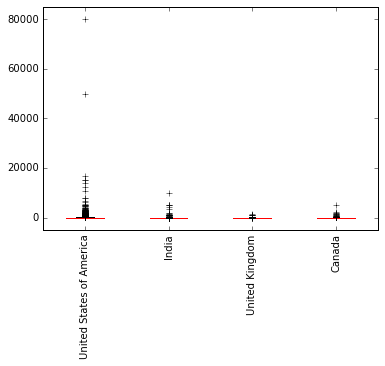

In [16]:
#data check
#money_nonan_2[['CountryLive','MoneyForLearning','MonthsProgramming','MoneyPerMonth']].sort_values('MoneyPerMonth', ascending=False)

graph_data = []
max_for_yaxis = 0
for country in wanted_c:
    tmp_data = money_nonan_2['MoneyPerMonth'][money_nonan_2['CountryLive']==country]
    graph_data.append(list(tmp_data))
    if max_for_yaxis < max(tmp_data):
        max_for_yaxis = max(tmp_data)

plt.boxplot(graph_data)
plt.xticks([1,2,3,4],wanted_c,rotation=90)
plt.ylim(-5000,max_for_yaxis+5000)
plt.show()

MONEY SPEND FOR TEACHING ANALYSIS - ROLE INTEREST FILTER INCLUDED + OUTLIERS REMOVED + ONLY United States of America|India|United Kingdom|Canada

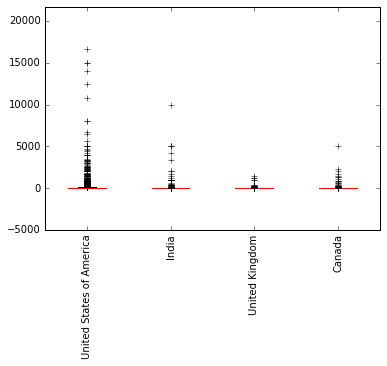

In [17]:
#separate required contries
only_4 = money_nonan_2[money_nonan_2['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

#print(only_4[['MoneyPerMonth', 'MoneyForLearning','MonthsProgramming']].sort_values('MoneyPerMonth', ascending=False))
#remove outliers - not by interquartile range
only_4 = only_4[only_4['MoneyPerMonth'] < 10000]

graph_data = []
max_for_yaxis = 0
for country in wanted_c:
    tmp_data = only_4['MoneyPerMonth'][only_4['CountryLive']==country]
    graph_data.append(list(tmp_data))
    if max_for_yaxis < max(tmp_data):
        max_for_yaxis = max(tmp_data)

plt.boxplot(graph_data)
plt.xticks([1,2,3,4],wanted_c,rotation=90)
plt.ylim(-5000,max_for_yaxis+5000)
plt.show()
    

In [18]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['MoneyPerMonth'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)]
only_4 = only_4.drop(no_bootcamp.index)

# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['MoneyPerMonth'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)]
only_4 = only_4.drop(less_than_3_months.index)

# Examine the extreme outliers for Canada
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['MoneyPerMonth'] > 4500)]
only_4 = only_4.drop(canada_outliers.index)

# Inspect the extreme outliers for India
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['MoneyPerMonth'] >= 2500)]
only_4 = only_4.drop(india_outliers.index)

In [20]:
# Recompute mean sum of money spent by students each month
only_4.groupby('CountryLive').mean()['MoneyPerMonth']

CountryLive
Canada                      105.057931
India                        64.958227
United Kingdom               49.117435
United States of America    153.605994
Name: MoneyPerMonth, dtype: float64

In [21]:
# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.970060
India                       11.586826
United Kingdom               7.395210
Canada                       6.047904
Name: CountryLive, dtype: float64

CONCLUSION - Best markets for our advertisement should by USA and Canada. India can be also considered.